<h1>Linear Algebra (CpE210A)</h1>
<br>
<h3>Laboratory 2: Plotting Vectors using NumPy and MatPlotLib</h3>

Coded and submitted by: 
<br>Chipongian, John Parick Ryan J.
<br>58010

<h5>Lab Exercises:</h5>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [38]:
'''
GRADED FUNCTION 1 (30 points)

Create a void function that prints that shows the output below. Fill in necessary codes to make fix the functions. 
Replace the 'None' types with the appropriate codes, you may add your lines if you want to improve or customize your code.

Hint: there are two ways to find the magnitude of a displacement. One way is to manually solve using the 
Pythagorean formula, you can try to look into using the np.sqrt() function. Another way is to use the
Euclidean norm or L2 norm using the np.linalg.norm() function. Please explain the new functions that you implemented.

'''
## START OF FUNCTION
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)                     ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)                      ## random integers for this activity. These two lines will produce
                                                                 ## a vector with shape of (3,) describing the distances for the 
                                                                 ## eagle's flight.

    dist1 = np.array([long[0],lat[0]])                           ## setup the array for each vector for the eagle's flight.
    dist2 = np.array([long[1],lat[1]])
    dist3 = np.array([long[2],lat[2]])

    dist_total = long.sum(0), lat.sum(0)                         ## compute for the resultant vector for the eagle's flight.
    disp = np.sqrt(np.add(lat.sum(0)**2,long.sum(0)**2))         ## compute for the magnitude of the displacement
    alpha = 10**-6
    theta =  np.arctan((np.divide((lat[0] + lat[1] + lat[2]),(long[0] + long[1] + long[2]))) + alpha )                            ## compute for the angle of the displacement. Hint
    theta = np.degrees(theta)                                    ## convert theta from rad to deg.
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
## END OF FUNCTION

<h3>Guide questions:</h3>
1. What is the use of the variable  α ?
<br>
It was used to compute the angle of the resultant vector
<br>   
2. Kindly explain the process of plotting the eagle flight vectors.
<br>
The plotting of the eagle flight vectors starts at origin which is the (0,0) of the graph then the next point is where the end of that vector will be, in example from the first vector is the point dist1[0],dist1[1]. After that when plotting the next vector, it will now originate from the end of the vector before that. The angles and scale_units are what plots the vectors in xy dimensions. Then the color sets what color would the vector would be. Label is used in what vector is being shown in the legend. Lastly, format is the magnitude and angle of the vector.

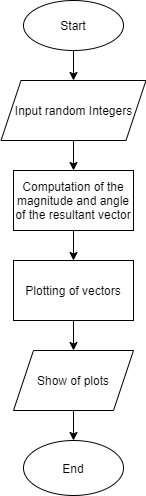

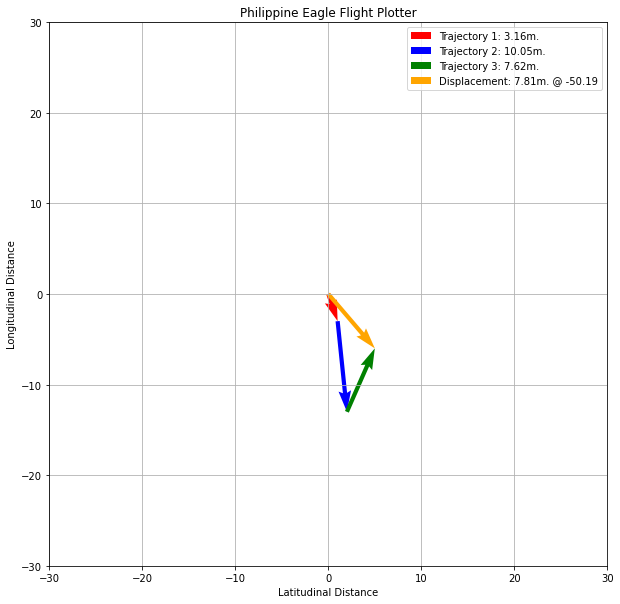

In [39]:
track_eagle(make_figs=True)

In [40]:
'''
GRADED CELL 2 (20 points)
This code models a bad practice among software engineers. The code exhibits a lack of documentation, comments, and vague
variable declarations. Aside from explaining and deconstructing the code, make an appropriate documentation as a markdown,
proper comments for significant lines of code, and changing variable names into easily-understood naming.
'''
def eagle_kinematics(displacement, time):
    req_shape = 4
    velocity = np.zeros((req_shape-1,))                                                   ## arrays the value of velocity as (0,0,0)                                     
    acceleration = np.zeros((req_shape-2,))                                               ## arrays the value of acceleration as (0,0)
    total_vect = np.array([time**3, time**2, time, 1])
    if displacement.shape == (req_shape,):
        velocity = np.array([3*displacement[0],2*displacement[1], displacement[2]])       ## Computes velocity
        acceleration = np.array([2*velocity[0],velocity[1]])                              ## Computes acceleration
        displacement_total = np.sum(np.multiply(displacement, total_vect))                ## Computes total displacement
        velocity_total = np.sum(np.multiply(velocity, total_vect[1:]))                    ## Computes total velocity
        acceleration_total = np.sum(np.multiply(acceleration, total_vect[2:]))            ## Computes total acceleration
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')  ## The display when there's error
    
    return displacement_total, velocity_total, acceleration_total

x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

What is the function for? Explain the inputs, process, functions used, and the outputs.
The function is for arraying the the three values that would be solve in the function, which is the displacement_t, Velocity_t, and acceleration_t. In solving the values, np_zeros is used to make array with the number that is given, np_sum() adds all the elements in the array, np_multiply() multiplies the two array element wise. The following are the equations for s_t, v_t, and a_t:<br><br>
$Displacement_t = (displacement * vector_t)$<br><br>
$Velocity_t = (velocity * vector_t)$<br><br>
$Acceleration_t = (acceleration * vector_t)$

In [41]:
'''
GRADED FUNCTION 3 (50 points)
This is the starter code that you would use for Bebang's project. You may use Part 1 as a reference to complete this code.
Please provide proper documentation, commenting, and necessary revisions to make the code clean and understandable.
'''
## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True): 
    
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        ## Computation for the Resultant Vector
        week_total = np.array([np.add(week1[0] + week2[0], week3[0] + week4[0]),np.add(week1[1] + week2[1], week3[1] + week4[1])])
        week_performance = np.sqrt([np.add(week_total[0]**2, week_total[1]**2)])
        week_performance = np.linalg.norm(week_performance)
        alpha = 10**-6
        reach_gradient =  np.arctan([np.divide(np.add(week1[1] + week2[1], week3[1] + week4[1]),
                                               np.add(week1[0] + week2[0], week3[0] + week4[0])) + alpha ])   # Computation for angle    
        reach_gradient = np.linalg.norm(np.degrees(reach_gradient))
        
        ## Plotting the the Bebang's month vectors
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        ## Plotting of the vectors of weeks 1 to 4
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        plt.quiver(week1[0], week1[1], week2[0], week2[1],
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0], week2[0]), np.add(week1[1], week2[1]),week3[0], week3[1],  
                   angles='xy', scale_units='xy',scale=1, color='pink', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        plt.quiver(np.add(week1[0] + week2[0], week3[0]), np.add(week1[1] + week2[1], week3[1]), week4[0], week4[1],
                   angles='xy', scale_units='xy',scale=1, color='brown', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        
        ## Plotting of the resultant vector
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    ## Error Statements
    else:
        print('Invalid number of profit values') 
        print('Invalid number of reach values')
        
## END OF FUNCTION  

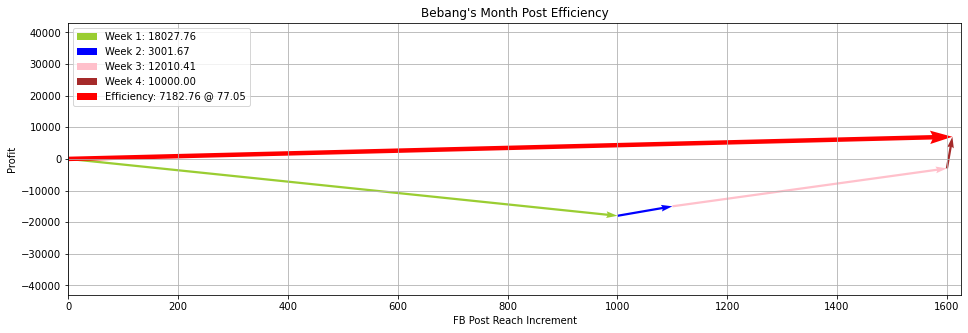

In [42]:
profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([1000, 100, 500, 10])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations

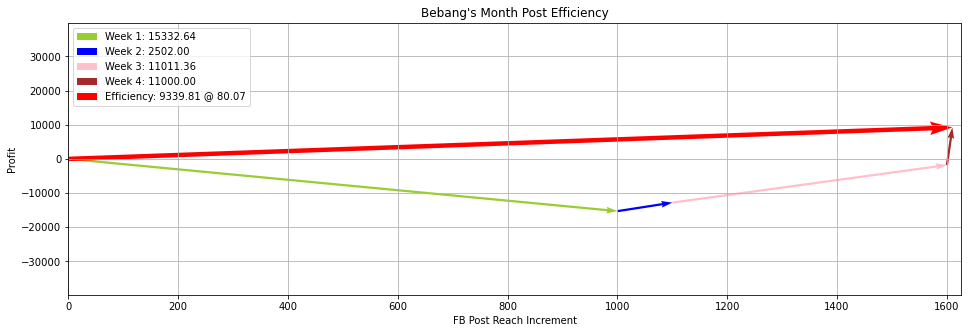

In [43]:
profit= np.array([-15300, 2500, 11000, 11000])   
reach = np.array([1000, 100, 500, 10])             

month_profit_trace(profit, reach, make_figs=False) 

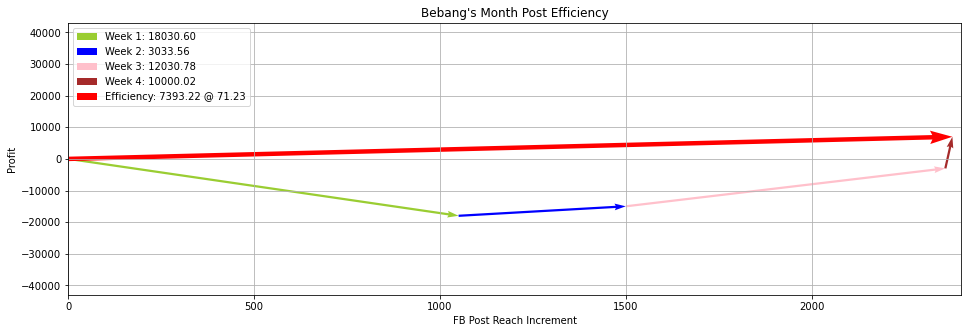

In [44]:
profit= np.array([-18000, 3000, 12000, 10000])   
reach = np.array([1050, 450, 860, 19])             

month_profit_trace(profit, reach, make_figs=False) 

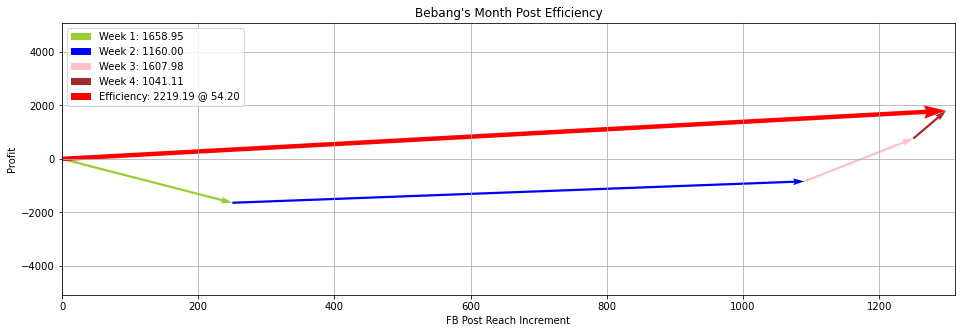

In [45]:
profit= np.array([-1640, 800, 1600, 1040])    
reach = np.array([250, 840, 160, 48])            

month_profit_trace(profit, reach, make_figs=False)



The relationship of the FB post reach and the profit is direct, it is because it shows higher value while the profit also increases. The reason of why the profit is in y-axis and the FB post reach is on the x-axis is because the FB post reach is the independent value and the profit is the dependent value. This means that the value depends to the value of the FB post reach, as it may increase when the FB post reach increase or it may also decrease when the FB post decreases. The vector of post efficiency origins at the (0,0) and the endpoint of it is the computed displacement of weeks 1 to 4.The angles and scale_units are what plots the vectors in xy dimensions. Then the color sets what color would the vector would be. The width sets the width of the vector of post efficiciency. The label is what sets the "Efficiency" in the Legend section of the graph, its magnitude and its angle. Lastly, format is the magnitude and angle of the vector.The formula used to find the performance_week and reach_gradient are the following:<br><br>
performance_week = $  \sqrt{dist_x^2 + dist_y^2} $ <br><br>
reach_gradient = $ \arctan({\frac{y_t}{ x_t\alpha})}$ <br><br>
The behavior of the vectors would depend to the values of the FB post reach and to the profits made with it. As the the FB post reach increases, the profit made also increases in the post efficiency of it.